# INVENTORY MANAGEMENT

In [310]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Understanding the dataset**

In [311]:
# importing dataset
df = pd.read_csv("ml_datated.csv");
df.head() #displaying first n rows of dataset

,RegionName,CountryName,State,City,PostalCode,WarehouseAddress,WarehouseName,EmployeeName,EmployeeEmail,EmployeePhone,...,CustomerName,CustomerAddress,CustomerCreditLimit,CustomerEmail,CustomerPhone,Status,OrderDate,OrderItemQuantity,PerUnitPrice,TotalItemQuantity
0,South America,United States of America,Texas,Southlake,26192,2014 Jabberwocky Rd,Southlake Texas,Summer Payne,summer.payne@example.com,5151238181,...,Flor Stone,2904 S Salina St,5000.0,flor.stone@raytheon.com,13171234104,Shipped,17-Nov-16,132,469.99,122
1,South America,United States of America,Texas,Southlake,26192,2014 Jabberwocky Rd,Southlake Texas,Rose Stephens,rose.stephens@example.com,5151238080,...,Lavera Emerson,"5344 Haverford Ave, Philadelphia",5000.0,lavera.emerson@plainsallamerican.com,13171234111,Shipped,20-Feb-17,124,519.99,123
2,South America,United States of America,Texas,Southlake,26192,2014 Jabberwocky Rd,Southlake Texas,Annabelle Dunn,annabelle.dunn@example.com,5151234444,...,Fern Head,"1795 Wu Meng, Muang Chonburi",1200.0,fern.head@usfoods.com,18121234115,Canceled,03-Jan-17,92,800.74,123
3,South America,United States of America,Texas,Southlake,26192,2014 Jabberwocky Rd,Southlake Texas,Tommy Bailey,tommy.bailey@example.com,5151234567,...,Shyla Ortiz,"Walpurgisstr 69, Munich",2400.0,shyla.ortiz@abbvie.com,13171234126,Pending,15-Oct-17,128,849.99,124
4,South America,United States of America,Texas,Southlake,26192,2014 Jabberwocky Rd,Southlake Texas,Blake Cooper,blake.cooper@example.com,5151234569,...,Jeni Levy,"Via Frenzy 6903, Roma",1200.0,jeni.levy@centene.com,18121214129,Shipped,09-Apr-17,106,109.99,125


In [312]:
#checking the size of the dataset
df.shape

(860, 28)

In [313]:
# basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RegionName           859 non-null    object 
 1   CountryName          859 non-null    object 
 2   State                860 non-null    object 
 3   City                 860 non-null    object 
 4   PostalCode           858 non-null    object 
 5   WarehouseAddress     859 non-null    object 
 6   WarehouseName        859 non-null    object 
 7   EmployeeName         860 non-null    object 
 8   EmployeeEmail        860 non-null    object 
 9   EmployeePhone        860 non-null    int64  
 10  EmployeeHireDate     847 non-null    object 
 11  EmployeeJobTitle     859 non-null    object 
 12  CategoryName         858 non-null    object 
 13  ProductName          858 non-null    object 
 14  ProductDescription   859 non-null    object 
 15  ProductStandardCost  859 non-null    flo

In [314]:
df.describe() #statistical summery for numerical columns

,EmployeePhone,ProductStandardCost,Profit,ProductListPrice,CustomerCreditLimit,PerUnitPrice,TotalItemQuantity
count,8.600000e+02,859.000000,8.580000e+02,858.000000,850.000000,8.600000e+02,860.000000
mean,1.390577e+12,1123.660151,3.587154e+10,1489.696503,15714.900000,6.381008e+14,189.994186
std,3.650365e+12,3024.694505,9.503032e+11,3103.675309,16056.487726,1.692416e+16,132.729205
min,1.856490e+07,11.210000,0.000000e+00,15.690000,100.000000,1.111000e+01,0.000000
25%,9.065753e+08,295.660000,8.754500e+01,534.442500,1825.000000,1.816350e+02,98.000000
50%,1.219803e+10,577.250000,1.924500e+02,949.945000,6805.000000,3.539800e+02,165.500000
75%,2.652550e+10,892.945000,3.359600e+02,1637.425000,29589.750000,6.824900e+02,267.250000
max,1.144164e+13,75410.000000,2.770000e+13,78180.000000,49734.000000,4.938900e+17,499.000000


In [315]:
df.describe(include='object') #statistical summery for categorical columns

,RegionName,CountryName,State,City,PostalCode,WarehouseAddress,WarehouseName,EmployeeName,EmployeeEmail,EmployeeHireDate,...,CategoryName,ProductName,ProductDescription,CustomerName,CustomerAddress,CustomerEmail,CustomerPhone,Status,OrderDate,OrderItemQuantity
count,859,859,860,860,858,859,859,860,860,847,...,858,858,859,858,859,859,860,860,860,856
unique,5,6,9,9,457,12,9,400,659,606,...,5,275,223,621,399,671,823,3,325,152
top,North America,United States of America,Washington,South Brunswick,50090,123 Main St,Mexico City,Sullivan Kissy,panjwaninina@example.com,10-Jan-11,...,Storage,G.Skill Ripjaws V Series,Chipset:GeForce GTX 1080 Ti,Manchester Robyn,567 South Dr,alagbetrina@customer.com,123-456-8821,Shipped,10-Feb-17,75
freq,270,256,108,107,46,163,106,6,7,13,...,217,14,25,6,169,8,3,327,21,15


In [316]:
# checking null values
df.isnull().sum()

RegionName              1
CountryName             1
State                   0
City                    0
PostalCode              2
WarehouseAddress        1
WarehouseName           1
EmployeeName            0
EmployeeEmail           0
EmployeePhone           0
EmployeeHireDate       13
EmployeeJobTitle        1
CategoryName            2
ProductName             2
ProductDescription      1
ProductStandardCost     1
Profit                  2
ProductListPrice        2
CustomerName            2
CustomerAddress         1
CustomerCreditLimit    10
CustomerEmail           1
CustomerPhone           0
Status                  0
OrderDate               0
OrderItemQuantity       4
PerUnitPrice            0
TotalItemQuantity       0
dtype: int64

In [317]:
df.isnull().sum() / len(df) * 100

RegionName             0.116279
CountryName            0.116279
State                  0.000000
City                   0.000000
PostalCode             0.232558
WarehouseAddress       0.116279
WarehouseName          0.116279
EmployeeName           0.000000
EmployeeEmail          0.000000
EmployeePhone          0.000000
EmployeeHireDate       1.511628
EmployeeJobTitle       0.116279
CategoryName           0.232558
ProductName            0.232558
ProductDescription     0.116279
ProductStandardCost    0.116279
Profit                 0.232558
ProductListPrice       0.232558
CustomerName           0.232558
CustomerAddress        0.116279
CustomerCreditLimit    1.162791
CustomerEmail          0.116279
CustomerPhone          0.000000
Status                 0.000000
OrderDate              0.000000
OrderItemQuantity      0.465116
PerUnitPrice           0.000000
TotalItemQuantity      0.000000
dtype: float64

In [318]:
# checking for dupicated rows
df.duplicated().sum()

7

In [319]:
print(df.index.duplicated().sum())  # Count duplicate indices

0


In [320]:
# Check the data types of each column
df.dtypes


RegionName              object
CountryName             object
State                   object
City                    object
PostalCode              object
WarehouseAddress        object
WarehouseName           object
EmployeeName            object
EmployeeEmail           object
EmployeePhone            int64
EmployeeHireDate        object
EmployeeJobTitle        object
CategoryName            object
ProductName             object
ProductDescription      object
ProductStandardCost    float64
Profit                 float64
ProductListPrice       float64
CustomerName            object
CustomerAddress         object
CustomerCreditLimit    float64
CustomerEmail           object
CustomerPhone           object
Status                  object
OrderDate               object
OrderItemQuantity       object
PerUnitPrice           float64
TotalItemQuantity        int64
dtype: object

In [321]:
df['EmployeeHireDate'] = pd.to_datetime(df['EmployeeHireDate'], errors='coerce')
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')

In [359]:
# Set 'OrderDate' as the index but keep the column
df.set_index('OrderDate', inplace=True, drop=False)

In [323]:
df.dtypes

RegionName                     object
CountryName                    object
State                          object
City                           object
PostalCode                     object
WarehouseAddress               object
WarehouseName                  object
EmployeeName                   object
EmployeeEmail                  object
EmployeePhone                   int64
EmployeeHireDate       datetime64[ns]
EmployeeJobTitle               object
CategoryName                   object
ProductName                    object
ProductDescription             object
ProductStandardCost           float64
Profit                        float64
ProductListPrice              float64
CustomerName                   object
CustomerAddress                object
CustomerCreditLimit           float64
CustomerEmail                  object
CustomerPhone                  object
Status                         object
OrderDate              datetime64[ns]
OrderItemQuantity              object
PerUnitPrice

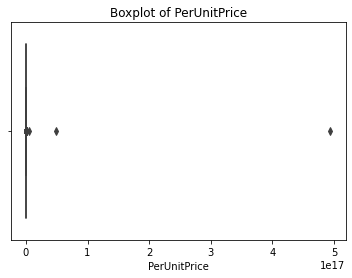

In [324]:
#checking for outliers
sns.boxplot(x=df['PerUnitPrice'])
plt.title('Boxplot of PerUnitPrice')
plt.show()

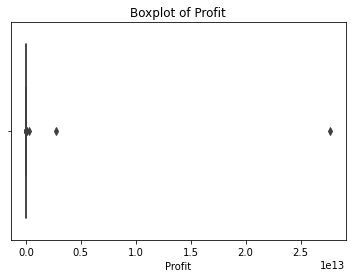

In [325]:
#checking for outliers
sns.boxplot(x=df['Profit'])
plt.title('Boxplot of Profit')
plt.show()

# **Data Cleaning**

**Handling inconsistant datatypes**

* Use pd.to_numeric() to convert string-like numeric entries into actual numbers. The errors='coerce' argument ensures that invalid strings are turned into NaN, which you can then handle.



In [326]:
# giving correct data dtype for OrderItemQuantity
df['OrderItemQuantity'] = pd.to_numeric(df['OrderItemQuantity'], errors='coerce')

**Handling the missing values**

 * You can either remove rows with missing data (dropna) or fill them using a strategy like the mean, median, or mode (fillna).


In [327]:
#filling the null values with mean for numerical column
df.fillna(df.mean(numeric_only=True), inplace=True)

In [328]:
#filling the null values with mode for categorical column
df['EmployeeHireDate'].fillna(df['EmployeeHireDate'].mode()[0], inplace=True)
df['CustomerName'].fillna(df['CustomerName'].mode()[0], inplace=True)
df['PostalCode'].fillna(df['PostalCode'].mode()[0], inplace=True)
df['CategoryName'].fillna(df['CategoryName'].mode()[0], inplace=True)
df['ProductName'].fillna(df['ProductName'].mode()[0], inplace=True)

In [329]:
# droping the null values
df.dropna(inplace=True)

In [330]:
# checking for null values after droping the rows
df.isnull().sum()

RegionName             0
CountryName            0
State                  0
City                   0
PostalCode             0
WarehouseAddress       0
WarehouseName          0
EmployeeName           0
EmployeeEmail          0
EmployeePhone          0
EmployeeHireDate       0
EmployeeJobTitle       0
CategoryName           0
ProductName            0
ProductDescription     0
ProductStandardCost    0
Profit                 0
ProductListPrice       0
CustomerName           0
CustomerAddress        0
CustomerCreditLimit    0
CustomerEmail          0
CustomerPhone          0
Status                 0
OrderDate              0
OrderItemQuantity      0
PerUnitPrice           0
TotalItemQuantity      0
dtype: int64

**Handling Duplicated values**


*   drop_duplicates() removes any rows that are duplicated.



In [331]:
#droping the duplicated rows
df.drop_duplicates(inplace=True)

In [332]:
df.duplicated().sum()

0

**Handling Outliers**
* The IQR method is used to remove outliers, and you can apply it to any column where you suspect extreme values.

In [333]:
# creating a funtion to remove outliers
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [334]:
# removing outliers for profit
df = remove_outliers_iqr(df, 'Profit')

In [335]:
# removing outliers for PerUnitPrice
df = remove_outliers_iqr(df, 'PerUnitPrice')

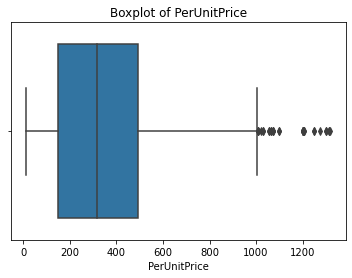

In [336]:
#checking for outliers after removing outliers
sns.boxplot(x=df['PerUnitPrice'])
plt.title('Boxplot of PerUnitPrice')
plt.show()

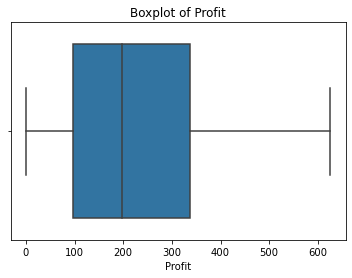

In [337]:
#checking for outliers after removing outliers
sns.boxplot(x=df['Profit'])
plt.title('Boxplot of Profit')
plt.show()

# **Data Visulization**

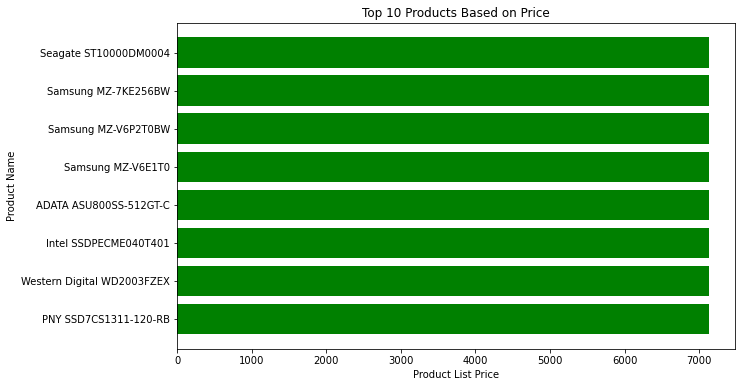

In [338]:
# top 10 products acording to its value or price
top_10_products = df[['ProductName', 'ProductListPrice']].sort_values(by='ProductListPrice', ascending= False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10_products['ProductName'], top_10_products['ProductListPrice'], color='green')
plt.xlabel('Product List Price')
plt.ylabel('Product Name')
plt.title('Top 10 Products Based on Price')
plt.gca().invert_yaxis()
plt.show()

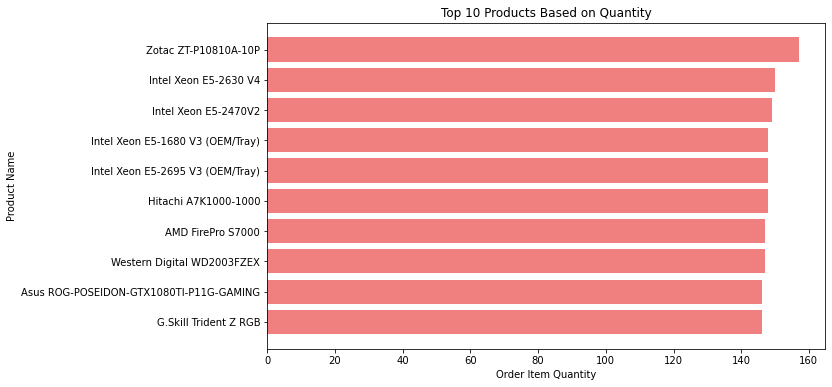

In [339]:
top_10_quantity = df[['ProductName', 'OrderItemQuantity']].sort_values(by='OrderItemQuantity', ascending=False).head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_quantity['ProductName'], top_10_quantity['OrderItemQuantity'], color='lightcoral')
plt.xlabel('Order Item Quantity')
plt.ylabel('Product Name')
plt.title('Top 10 Products Based on Quantity')
plt.gca().invert_yaxis()  # Inverts y-axis to display the highest quantity at the top
plt.show()

In [340]:
# Aggregate sales by warehouse
df['SalesValue'] = df['OrderItemQuantity'] * df['PerUnitPrice']
sales_by_warehouse = df.groupby('WarehouseName')['SalesValue'].sum()


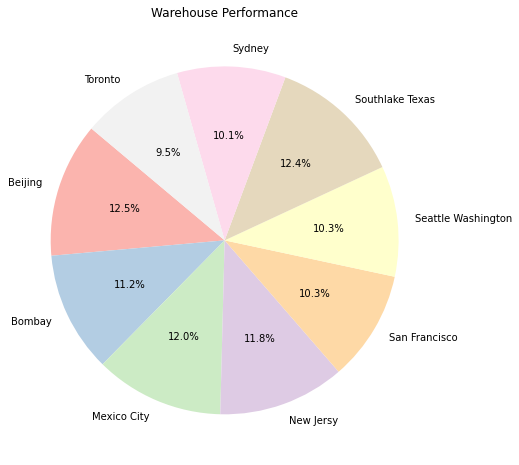

In [341]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_by_warehouse, labels=sales_by_warehouse.index, autopct='%1.1f%%', startangle=140, 
        colors=plt.get_cmap('Pastel1').colors)
plt.title('Warehouse Performance')
plt.show()

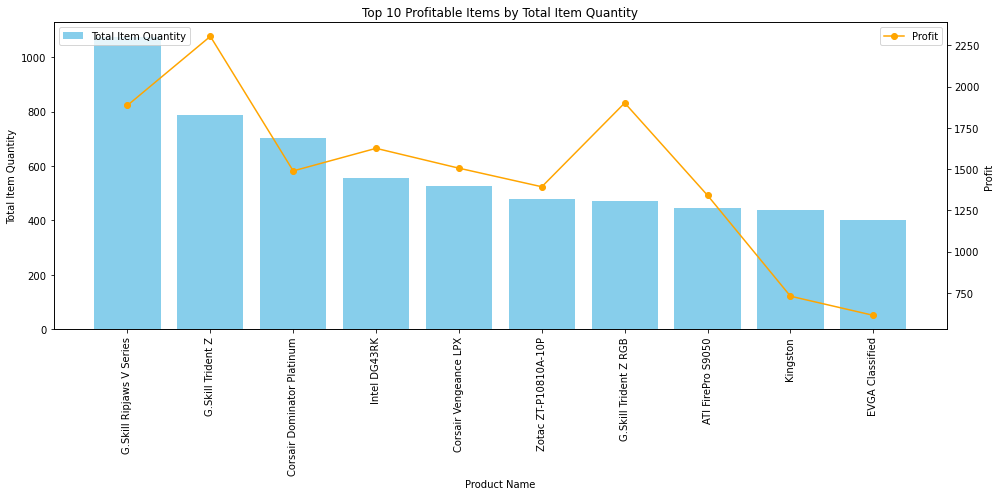

In [342]:
# Calculate total quantity and total profit for each item
item_summary = df.groupby('ProductName').agg({'OrderItemQuantity': 'sum', 'Profit': 'sum'}).reset_index()

# Sort by total quantity and select the top 10
top_10_items = item_summary.sort_values(by='OrderItemQuantity', ascending=False).head(10)
df['SalesValue'] = df['OrderItemQuantity'] * df['PerUnitPrice']
# Plotting the data
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar chart for Total Item Quantity
ax1.bar(top_10_items['ProductName'], top_10_items['OrderItemQuantity'], color='skyblue', label='Total Item Quantity')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Total Item Quantity')
ax1.set_title('Top 10 Profitable Items by Total Item Quantity')
plt.xticks(rotation=90)

# Create a secondary y-axis to plot profit
ax2 = ax1.twinx()
ax2.plot(top_10_items['ProductName'], top_10_items['Profit'], color='orange', marker='o', linestyle='-', label='Profit')

# Add labels and legend
ax2.set_ylabel('Profit')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()

plt.show()

In [343]:
# Convert 'OrderDate' column to datetime if it's not already
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Calculate Inventory Value for each row
df['InventoryValue'] = df['TotalItemQuantity'] * df['PerUnitPrice']

# Group by month and calculate the sum of InventoryValue
inventory_value_by_time = df.groupby(df['OrderDate'].dt.to_period('M'))['InventoryValue'].sum().reset_index()

In [344]:
# Convert period to datetime for plotting
inventory_value_by_time['OrderDate'] = inventory_value_by_time['OrderDate'].dt.to_timestamp()

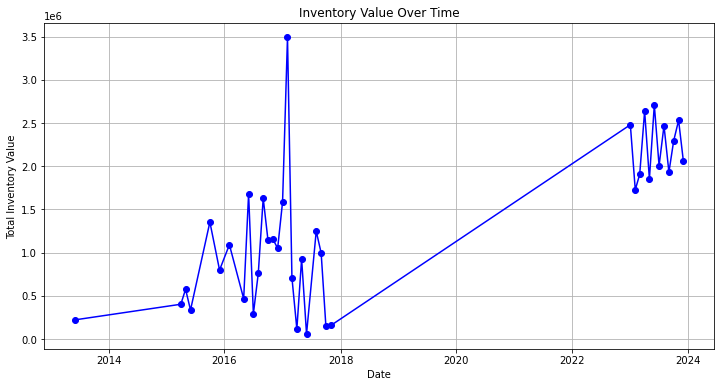

In [345]:
plt.figure(figsize=(12, 6))
plt.plot(inventory_value_by_time['OrderDate'], inventory_value_by_time['InventoryValue'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Total Inventory Value')
plt.title('Inventory Value Over Time')
plt.grid(True)
plt.show()

In [346]:
df.head()

,RegionName,CountryName,State,City,PostalCode,WarehouseAddress,WarehouseName,EmployeeName,EmployeeEmail,EmployeePhone,...,CustomerCreditLimit,CustomerEmail,CustomerPhone,Status,OrderDate,OrderItemQuantity,PerUnitPrice,TotalItemQuantity,SalesValue,InventoryValue
0,South America,United States of America,Texas,Southlake,26192,2014 Jabberwocky Rd,Southlake Texas,Summer Payne,summer.payne@example.com,5151238181,...,5000.0,flor.stone@raytheon.com,13171234104,Shipped,2016-11-17,132.0,469.99,122,62038.68,57338.78
1,South America,United States of America,Texas,Southlake,26192,2014 Jabberwocky Rd,Southlake Texas,Rose Stephens,rose.stephens@example.com,5151238080,...,5000.0,lavera.emerson@plainsallamerican.com,13171234111,Shipped,2017-02-20,124.0,519.99,123,64478.76,63958.77
2,South America,United States of America,Texas,Southlake,26192,2014 Jabberwocky Rd,Southlake Texas,Annabelle Dunn,annabelle.dunn@example.com,5151234444,...,1200.0,fern.head@usfoods.com,18121234115,Canceled,2017-01-03,92.0,800.74,123,73668.08,98491.02
3,South America,United States of America,Texas,Southlake,26192,2014 Jabberwocky Rd,Southlake Texas,Tommy Bailey,tommy.bailey@example.com,5151234567,...,2400.0,shyla.ortiz@abbvie.com,13171234126,Pending,2017-10-15,128.0,849.99,124,108798.72,105398.76
4,South America,United States of America,Texas,Southlake,26192,2014 Jabberwocky Rd,Southlake Texas,Blake Cooper,blake.cooper@example.com,5151234569,...,1200.0,jeni.levy@centene.com,18121214129,Shipped,2017-04-09,106.0,109.99,125,11658.94,13748.75


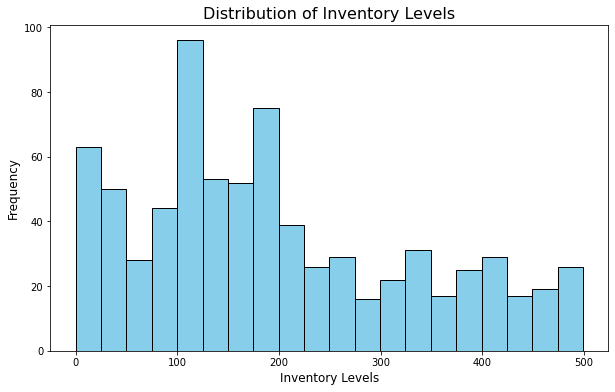

In [347]:
# Univariate analysis,Histogram of inventory levels
plt.figure(figsize=(10, 6))
plt.hist(df['TotalItemQuantity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Inventory Levels', fontsize=16)
plt.xlabel('Inventory Levels', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

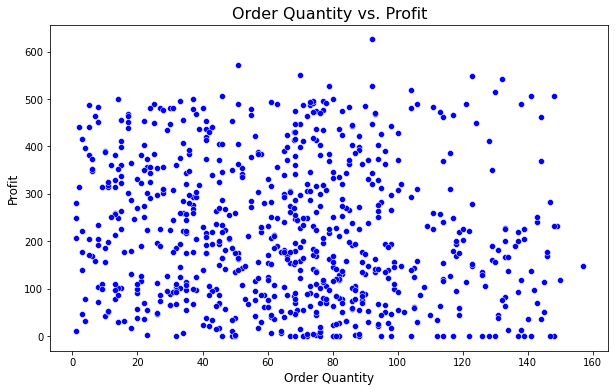

In [348]:
import seaborn as sns
# Bivariate analysis,Scatter plot of order quantity vs. profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='OrderItemQuantity', y='Profit', data=df, color='blue')
plt.title('Order Quantity vs. Profit', fontsize=16)
plt.xlabel('Order Quantity', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.show()

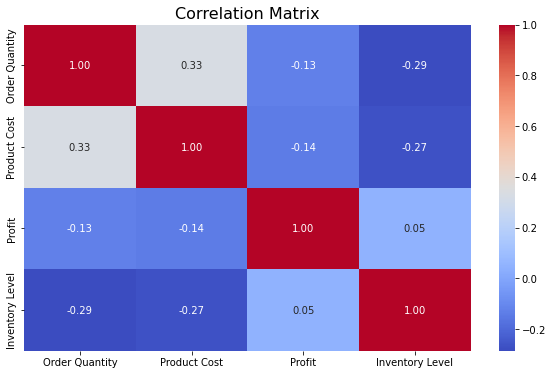

In [349]:
feature = df[['OrderItemQuantity', 'PerUnitPrice', 'Profit', 'TotalItemQuantity']]  
features = feature.rename(columns={
    'OrderItemQuantity': 'Order Quantity',
    'PerUnitPrice': 'Product Cost',
    'Profit': 'Profit',
    'TotalItemQuantity': 'Inventory Level'
})
corr_matrix = features.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=16)
plt.show()


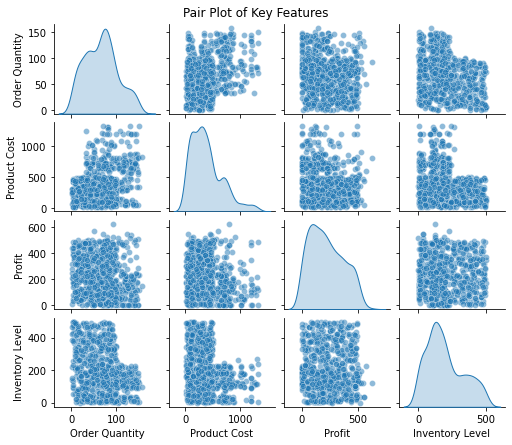

In [394]:
sns.pairplot(features, diag_kind='kde', plot_kws={'alpha':0.5}, height=1.5, aspect=1.2)
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

In [351]:
df['OrderItemQuantity'] = pd.to_numeric(df['OrderItemQuantity'], errors='coerce')
df['TotalItemQuantity'] = pd.to_numeric(df['TotalItemQuantity'], errors='coerce')

In [352]:
df['inventory_turnover'] = df['OrderItemQuantity'] / df['TotalItemQuantity']

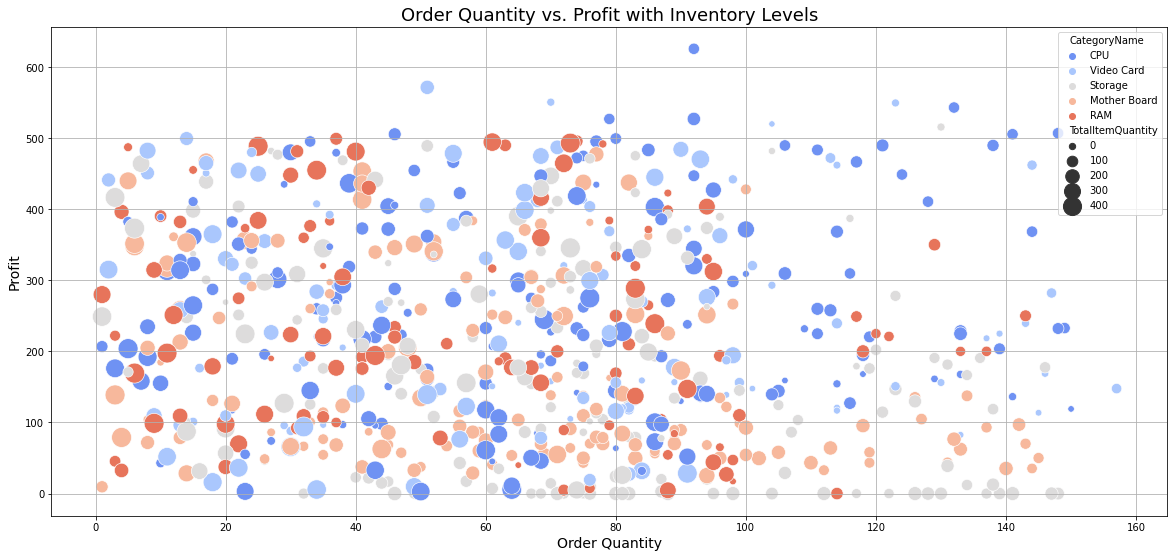

In [353]:
plt.figure(figsize=(20, 9))
sns.scatterplot(x='OrderItemQuantity', y='Profit', hue='CategoryName', size='TotalItemQuantity', sizes=(40, 400), data=df, palette='coolwarm')
plt.title('Order Quantity vs. Profit with Inventory Levels',fontsize=18)
plt.xlabel('Order Quantity',fontsize=14)
plt.ylabel('Profit',fontsize=14)
plt.grid(True)
plt.show()

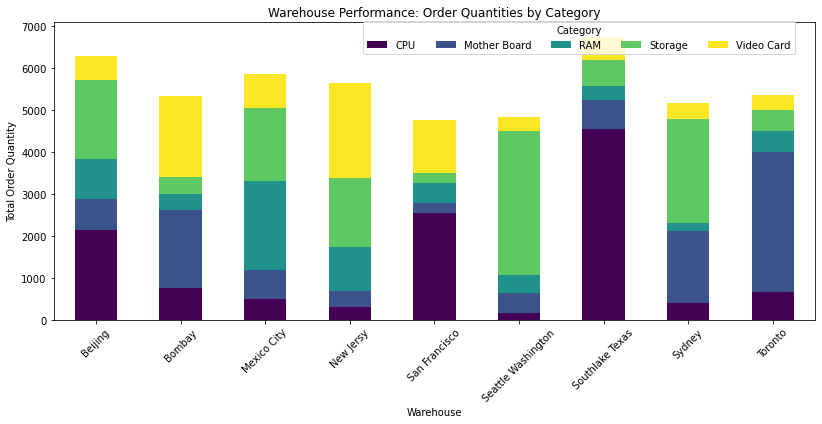

In [354]:
df_grouped = df.groupby(['WarehouseName', 'CategoryName'])['OrderItemQuantity'].sum().unstack().fillna(0)
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Warehouse Performance: Order Quantities by Category')
plt.xlabel('Warehouse')
plt.ylabel('Total Order Quantity')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(0.4, 1.02), loc='upper left', ncol=5)
plt.tight_layout()
plt.show()

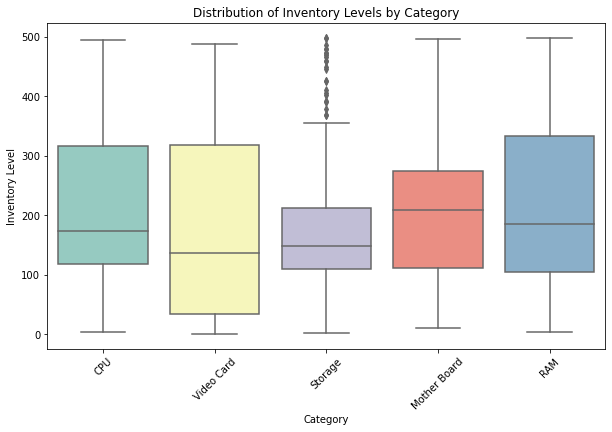

In [355]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CategoryName', y='TotalItemQuantity', data=df, palette='Set3')
plt.title('Distribution of Inventory Levels by Category')
plt.xlabel('Category')
plt.ylabel('Inventory Level')
plt.xticks(rotation=45)
plt.show()

In [356]:
from statsmodels.tsa.seasonal import seasonal_decompose

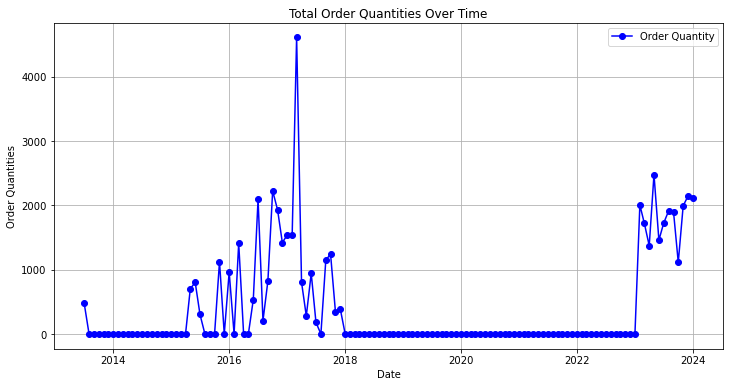

In [360]:
# Aggregate order quantities over time
monthly_demand = df.resample('M')['OrderItemQuantity'].sum()

# Line plot for trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_demand, marker='o', label='Order Quantity', color='blue')
plt.title('Total Order Quantities Over Time')
plt.xlabel('Date')
plt.ylabel('Order Quantities')
plt.grid(True)
plt.legend()
plt.show()

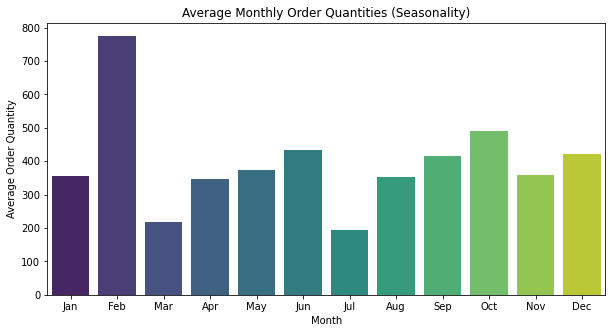

In [361]:
# Group by month to find average demand across years
monthly_seasonality = monthly_demand.groupby(monthly_demand.index.month).mean()
monthly_seasonality.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Bar plot for seasonality
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_seasonality.index, y=monthly_seasonality.values, palette='viridis')
plt.title('Average Monthly Order Quantities (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Average Order Quantity')
plt.show()


<Figure size 864x432 with 0 Axes>

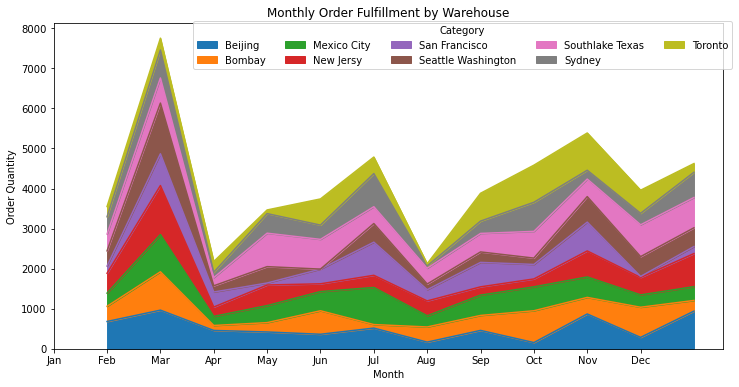

In [383]:
# Monthly order fulfillment by Warehouse using stacked area plot
plt.figure(figsize=(12, 6))
warehouse_monthly_order = df.groupby([df.index.month, 'WarehouseName'])['OrderItemQuantity'].sum().unstack()
warehouse_monthly_order.plot(kind='area', stacked=True, figsize=(12, 6))

plt.title('Monthly Order Fulfillment by Warehouse')
plt.xlabel('Month')
plt.ylabel('Order Quantity')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Category', bbox_to_anchor=(0.2, 1.02), loc='upper left', ncol=5)
plt.show()


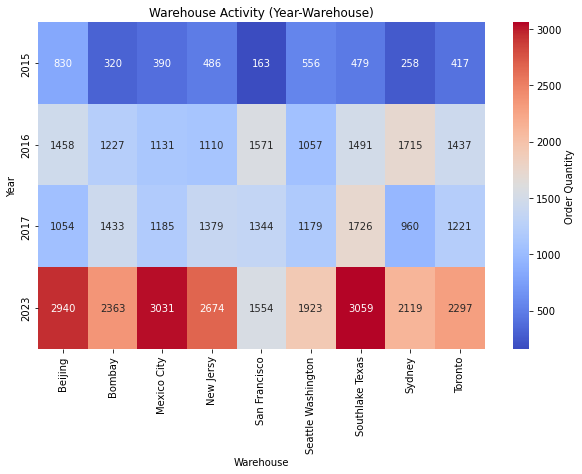

In [397]:
filtered_df = df[df.index.year.isin([2015, 2016, 2017, 2023])]

# Reshape the data for heatmap
warehouse_heatmap = filtered_df.groupby([filtered_df.index.year, 'WarehouseName'])['OrderItemQuantity'].sum().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(warehouse_heatmap, annot=True, fmt='.0f', cmap='coolwarm', cbar_kws={'label': 'Order Quantity'})
plt.title('Warehouse Activity (Year-Warehouse)')
plt.xlabel('Warehouse')
plt.ylabel('Year')
plt.show()


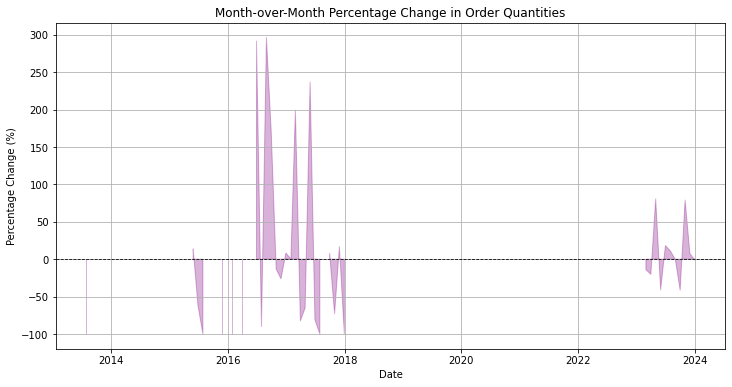

In [389]:
plt.figure(figsize=(12, 6))
plt.fill_between(monthly_change.index, monthly_change.values, color='purple', alpha=0.3)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title('Month-over-Month Percentage Change in Order Quantities')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.grid(True)
plt.show()